In [33]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import calendar
import datetime
from itertools import chain


# Useful link for Notebook graphic editing:https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

# Define Fiscal Year (Starts at every July), Period (July is P1), and Description for accountant to post
# This organization's Fiscal Year starts at every July, and the accounting team set July as the first period of the Fiscal year.
def fy(yyyymm):
    year = yyyymm/100
    month = yyyymm % 100
    period = month - 6
    if month >6:
        year = year +1
    elif period <0:
        period = period +12
    return round(year)-2000

def pd(yyyymm):
    year = yyyymm/100
    month = yyyymm % 100
    period = month - 6
    if month >6:
        year = year +1
    elif period <0:
        period = period +12
        #print(period)
    return period

def description(program,fy,period,month):
    return str(program,fy,period,month)




## Using Python to improve the efficiency on generating report for the program team and the accounting team
Sixian Chen

11/20/2020

LinkedIn: http://linkedin.com/in/seashane-sixian-chen


<div class="alert alert-block alert-info">
    
#### Background of this project 
A non-for-profit organization operates programs for intellectual developmental disability patients. Every week the fiscal team receives the remittance data from Medicaid, and the team needs to analyze the data, and reports it to the bookkeeping team and the program operation team.
Before using Python, the accounting team needs to spend about one hour to organize and analyze the data using Excel. Also, the report generated by Excel has limited insight to the program operation team to improve the billing process. In order to improve the efficiency and optimize the usage of remittance data, the accounting team decides to use Python script to generate remittance report.   
Data used in this project has been manipulated and randomized.  
<div>
   

<div class="alert alert-block alert-warning">
To start, please enter the csv file name below.<div>

In [34]:
import pandas as pd
from pandas import DataFrame, read_csv

filename=str(input("Please enter the csv file name, and end with [.csv]:"))

#df = pd.read_csv("091619.csv")
df = pd.read_csv(filename)

Please enter the csv file name, and end with [.csv]:091619.csv


<div class="alert alert-block alert-success">
The following table shows the column names and their data types. However, not all the columns would be used by the accounting team for analyzing the remittance.
<div>

In [35]:
import pandas as pd

pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[0]+1)

df.dtypes

remit_filename               object
sequence_no                   int64
batch_no                      int64
remit_number                  int64
invoice                       int64
line_no                       int64
account                     float64
first_name                   object
last_name                    object
mi                           object
patient_name                 object
reference_no                  int64
check_no                      int64
company_code                float64
payor_id                    float64
insurance_id                 object
remit_code                  float64
remit_code_desc              object
remit_status                 object
transaction_date             object
transaction_type              int64
amount                      float64
tot_charge_paid             float64
tot_charge_deny             float64
tot_charge_pend               int64
claim_paid                    int64
claim_deny                    int64
claim_pend                  

-------
<h3><center>WEEKLY REMITTANCE REPORT - TO EXECUTIVES AND PROGRAM DIRECTORS</center></h3>

<div class="alert alert-block alert-success">
This section gives basic information of the weekly remittance summary of different programs, by showing the amounts that were claimed, paid, and denied, with denial percentage. It also shows the list of clients that were not fully paid, with corresponding claim adjustment reason codes (the remit codes) and the remark codes. The billing specialist can contact the insurance company and rebill the clients based on their codes.
<div>

In [36]:
#df = pd.read_csv(filename)
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[0]+1)

# Rename the Column Titles
df = df[["last_name","remit_status","amount_paid","amount","amount_adj","proc_code","date_of_service_yyyymm","remit_posting_date","remark_code_all","remit_code","date_of_service"]]
df.columns = ["name","status","paid","claimed","deny","code","month","remit date","remark #","remit #","date"]

# Privacy - making patients name to "*", and manipulate random numbers 
# creating dictionary for trans table 
trans_dict ={"a": "*", "e": "*", "i": "*","o": "*","u": "*","b": "*","f": "*","j": "*","p": "*","v": "*","y": "*","n": "*","l": "*"}   
# creating translate table from dictionary 
trans_table ="abc".maketrans(trans_dict)   
# translating through passed transtable 
df["name"]= df["name"].str.translate(trans_table) 
# Randomized the financial data
import random
n = random.random()*5
df["paid"]= df["paid"]*n
df["claimed"]= df["claimed"]*n
df["deny"]= df["deny"]*n

# Mapping programs by proc codes.
    # if we have new programs and new proc codes, please add it right here!!!
df['program'] = df['code'].map({4781: 'PreVoc', 4782: 'PreVoc',4783: 'PreVoc',4453: 'Day Hab', 4454: 'Day Hab', 4444: 'Pathway',4445: 'Pathway',7423: 'Respite', 4790:"SEMP Caid", 4791:"SEMP Caid", 4792:"SEMP Caid", 4793:"SEMP Caid", 4759:"SEMP Caid", 4760:"SEMP Caid", 4761:"SEMP Caid",})
df['paid %'] = df['paid']/df['claimed'] *100

# Dataframes for further analysis
sum_df = df.groupby(['program','month']).agg({'claimed': 'sum','paid': 'sum', 'deny': 'sum'}).round(2)
sum_df['paid %'] = sum_df['paid']/sum_df['claimed'] *100
byprogram = df.groupby("program").agg({'claimed': 'sum','paid': 'sum', 'deny': 'sum'}).round(2)

byclient = df.groupby(["name","program","month"]).agg({'claimed': 'sum','paid': 'sum', 'deny': 'sum'}).round(2).sort_values(by=["name","deny"])
byclient['paid %'] = byclient['paid']/byclient['claimed'] *100

# Formatting the remit date into yyyymm
remit_date =int( datetime.datetime.strptime(df["remit date"].unique().item(), '%m/%d/%Y %H:%M:%S %p').strftime('%Y%m'))



#### BASIC INFO

In [37]:
print(df["remit date"].unique().item(),"was the remit posting time.")
print("Total line read is",len(df))
print(" ")
print("Total payment will be received of the week is $",df["paid"].sum().round(2))
print("Total denial amount is $",df["deny"].sum().round(2))
print("Total claimed amount is $",df["claimed"].sum().round(2))

9/16/2019 8:43:32 AM was the remit posting time.
Total line read is 3534
 
Total payment will be received of the week is $ 2169187.28
Total denial amount is $ 78679.79
Total claimed amount is $ 2247867.07


#### PAYMENT ANALYSIS


In [38]:
print("1.Summary")
print(byprogram.round(2))
print(" ")

print("2.Detail")
print(sum_df.round(2),"\n")


1.Summary
              claimed        paid      deny
program                                    
Day Hab    1339074.53  1268926.58  70147.94
Pathway      74679.35    77661.67  -2982.32
PreVoc      144835.17   142248.93   2586.24
SEMP Caid   689278.02   680350.10   8927.92
 
2.Detail
                     claimed        paid      deny  paid %
program   month                                           
Day Hab   201801     2856.70        0.00   2856.70    0.00
          201802     5119.30        0.00   5119.30    0.00
          201803     5850.63        0.00   5850.63    0.00
          201804     5850.63        0.00   5850.63    0.00
          201805    16089.24     8181.00   7908.24   50.85
          201806    16733.86    10040.32   6693.54   60.00
          201807    17849.45    12477.66   5371.79   69.91
          201808     9668.45     9541.74    126.71   98.69
          201809     7065.41     6972.81     92.60   98.69
          201810    18221.32    17982.52    238.80   98.69
       

Text(0.5, 1.0, 'Remittance Status of The Week')

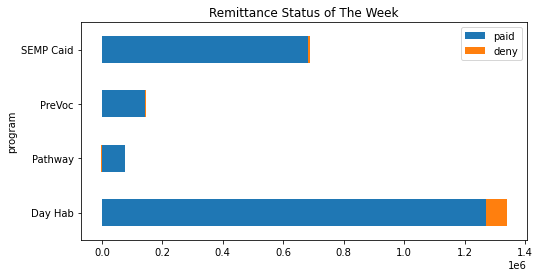

In [39]:
byprogram.plot.barh(y=['paid','deny'],stacked=True, figsize=(8,4))
plt.title('Remittance Status of The Week')

#### CLIENT ANALYSIS

In [40]:
print("Client that were denied (by programs):")
byclient_deny = byclient[byclient["deny"]>0]
print(byclient_deny.round(2))

Client that were denied (by programs):
                             claimed      paid      deny  paid %
name      program   month                                       
A**m      Day Hab   201809   5206.09   5137.86     68.23   98.69
                    201810   5949.82   5871.84     77.98   98.69
                    201808   6693.54   6605.82     87.72   98.69
                    201801   2856.70      0.00   2856.70    0.00
                    201802   5119.30      0.00   5119.30    0.00
                    201805   5119.30      0.00   5119.30    0.00
                    201807   6693.54   1467.96   5225.58   21.93
                    201803   5850.63      0.00   5850.63    0.00
                    201804   5850.63      0.00   5850.63    0.00
                    201806   6693.54      0.00   6693.54    0.00
A*str**   Day Hab   201906  13403.23      0.00  13403.23    0.00
Ahm*d     Day Hab   201907    744.62      0.00    744.62    0.00
          PreVoc    201907   2586.24      0.00   25

#### REMARK AND REMIT CODE REPORT

In [41]:
print("1. REMARK CODE BY PROGRAMS:")
byprogram_remark = df.groupby(["program","remark #","name"]).agg({'claimed': 'sum','paid': 'sum', 'deny': 'sum'}).round(2)
print(byprogram_remark.round(2))

print(" ")
print("2. REMIT CODE BY PROGRAMS:")
byprogram_remit = df.groupby(["program","remit #","name"]).agg({'claimed': 'sum','paid': 'sum', 'deny': 'sum'}).round(2)
print(byprogram_remit.round(2))


1. REMARK CODE BY PROGRAMS:
                            claimed  paid      deny
program   remark # name                            
Day Hab   N30      Ahm*d     744.62   0.0    744.62
                   B*kk*r  15637.10   0.0  15637.10
PreVoc    N30      Ahm*d    2586.24   0.0   2586.24
SEMP Caid N30      D****    7171.61   0.0   7171.61
 
2. REMIT CODE BY PROGRAMS:
                                 claimed      paid      deny
program   remit # name                                      
Day Hab   29.0    A**m          36696.21      0.00  36696.21
                  S*rt*r*        2925.32      0.00   2925.32
          45.0    A**m          28144.67  28018.97    125.70
                  D**m***       36111.24  36327.89   -216.65
                  S*rt*r*       25150.34  25062.54     87.80
          96.0    Ahm*d           744.62      0.00    744.62
                  B*kk*r        15637.10      0.00  15637.10
          200.0   A*str**       13403.23      0.00  13403.23
                  M**

<font color='Grey'><font size="2">

#### References        
#### Claim Adjustment Reason Codes:   
B1 Non-covered visits.   
15 Payment adjusted because the submitted authorization number is missing  
16 Claim/service lacks information which is needed for adjudication.    
24 Payment for charges adjusted. Charges are covered under a capitation agreement/managed care plan.   
29 The time limit for filing has expired.   
45 Charges exceed your contracted/ legislated fee arrangement.   
96 Non-covered charge(s).   
97 Payment is included in the allowance for another service/procedure.   
200 no description found  
    
#### Remark Codes:  
MA39 Missing/incomplete/invalid gender.  
M49 Missing/incomplete/invalid value code(s) or amount(s).   
M62 Missing/incomplete/invalid treatment authorization code.   
M86 Service denied because payment already made for same/similar procedure within set time frame.   
N216 Patient is not enrolled in this portion of our benefit package.   
N30 Patient ineligible for this service.    
N340 Missing/incomplete/invalid subscriber birth date.    
</font> 

#### PAYMENTS SUMMARY BY DATE OF SERVICES

In [42]:
dailysummary = input("Showing payment summary by date of service? (yes/no): ")

if dailysummary == "yes":
    service = df.groupby(['program','date']).agg({'paid': 'sum'}).round(2)
    service = service[service.paid >0].sort_values(by=["program","date"])
    print("\n",service.round(2))

Showing payment summary by date of service? (yes/no): yes

                           paid
program   date                
Day Hab   1/10/2019     372.33
          1/11/2019    1116.96
          1/14/2019    1116.96
          1/15/2019     372.33
          1/16/2019     372.33
          1/17/2019     372.33
          1/18/2019    1116.96
          1/2/2019      372.33
          1/22/2019     372.33
          1/23/2019     372.33
          1/24/2019     372.33
          1/25/2019    1116.96
          1/28/2019     744.62
          1/29/2019     372.33
          1/3/2019      372.33
          1/30/2019     372.33
          1/31/2019     372.33
          1/4/2019     1116.96
          1/7/2019     1116.96
          1/8/2019      372.33
          1/9/2019      372.33
          10/1/2018    1100.97
          10/10/2018    366.99
          10/11/2018    733.98
          10/12/2018   1100.97
          10/15/2018   1100.97
          10/17/2018    366.99
          10/18/2018    366.99
          

#### PAYMENTS SUMMARY BY NAME THEN DATE OF SERVICES


In [43]:
dailysummary = input("Showing payment summary by name then date of service? (yes/no): ")

if dailysummary == "yes":
    service = df.groupby(['program','name','date']).agg({'paid': 'sum'}).round(2)
    service = service[service.paid >0].sort_values(by=["program",'name',"date"])
    print("\n",service.round(2))
    

Showing payment summary by name then date of service? (yes/no): no


-------
<h3><center>WEEKLY REMITTANCE REPORT - TO ACCOUNTING AND BOOKKEEPING TEAM</center></h3>

<div class="alert alert-block alert-success">
This section gives basic information of the weekly remittance summary of different programs, by showing the amounts that were claimed, paid, and denied, with denial percentage. Since some of the programs have different cost centers, the fiscal team need to allocate the payments into different cost centers before sending the report to the bookkeeping team. On the report, the fiscals need to write down the descriptions for the bookkeepers to post on the general ledger system.
<div>

#### BASIC INFO

In [44]:
print("Total payment will be received of the week is $",df["paid"].sum().round(2))

Total payment will be received of the week is $ 2169187.28


#### PREVIEW DETAILS

In [45]:
sum_df = sum_df[sum_df.paid > 0]
print(sum_df.round(2))

                     claimed        paid      deny  paid %
program   month                                           
Day Hab   201805    16089.24     8181.00   7908.24   50.85
          201806    16733.86    10040.32   6693.54   60.00
          201807    17849.45    12477.66   5371.79   69.91
          201808     9668.45     9541.74    126.71   98.69
          201809     7065.41     6972.81     92.60   98.69
          201810    18221.32    17982.52    238.80   98.69
          201811    15046.60    15046.60      0.00  100.00
          201812     7706.79     7706.79      0.00  100.00
          201901    12477.66    12659.00   -181.33  101.45
          201902    12110.67    12286.63   -175.95  101.45
          201903     9174.75     9308.05   -133.30  101.45
          201904    11914.18    11914.18      0.00  100.00
          201905     8935.80     8935.80      0.00  100.00
          201907  1137042.86  1120661.13  16381.72   98.56
          201908     5212.37     5212.37      0.00  100.

<div class="alert alert-block alert-success">
The preview details section shows the remittance payment received at this week. According to the billing circle, when some programs receive big payments at a certain month, the programs would need to allocate the payments to different cost centers. In this remittance, we received the Medicaid payments from 5 programs: Day Hab, Pathway, PreVoc, Respite, and SEMP(Caid). Among these programs, Day Hab, Pathway, and SEMP have multiple cost centers. Therefore, in the Python script below, we enable an option for payment allocation for these 3 programs.
The payment allocation amount depends on the estimated revenue given by the program operation staff, and the revenue is booked before we received the actual payment.
<div>

#### NOTICE TO BOOKKEEPING TEAM

In [46]:
current_pd = remit_date

df['cc'] = df['program'].map({'PreVoc':'PVCC1','Day Hab':'Multi', 'Pathway':'Multi', 'Respite':'RPCC1',"SEMP Caid":'Multi'})
df['fy'] = df['month'].apply(fy)

def pd(yyyymm):
    year = yyyymm/100
    month = yyyymm % 100
    period = month - 6
    if month >6:
        year = year +1
    elif period <0:
        period = period +12
        #print(period)
    return period
df['pd'] = pd(current_pd)

df["description"] = df['program'] +" "+ df['fy'].map(str)+" P"+df['pd'].map(str)+" "+df['month'].map(str)


In [47]:
df['pd'] = pd(current_pd)
df["description"] = df['program'] +" "+ df['fy'].map(str)+" P"+df['pd'].map(str)+" "+df['month'].map(str)

breakdown_df = df.groupby(['program','fy','month','cc','description']).agg({'paid': 'sum'}).round(2)


breakdown_df= breakdown_df[breakdown_df["paid"]>0]

monthly_bd = breakdown_df[breakdown_df["paid"]>100000]

breakdown_df = breakdown_df.reset_index()
while (True):
    choice = input("Payment allocation for monthly billing needed? (yes/no): ")
    #choice == "no"
    if choice == "no":
        breakdown_df['cc'] = breakdown_df['program'].map({'PreVoc':'PVCC1','Day Hab':'DHCC1', 'Pathway':'PWCC1', 'Respite':'RPCC1',"SEMP Caid":'SCCC1'})
        print(" ")
        print(breakdown_df)
        break
    elif choice == "yes":
        print(" ")
        print(breakdown_df)
        print("\n*********************************************")
        dayhab = input("Allocation for Day Hab? (yes/no): ")    
        
        #dayhab == "yes"
        if dayhab == "no":
            print("\nPlease post everything under cost center DHCC1.")
            print("-------------------")
            pass
        elif dayhab == "yes":
            dhmonth = int(input("What is the month for this payment? yyyymm: "))
            dhlic = float(input(">>Payment allocates to cost center DHCC2: "))
            dhbk = float(input(">>Payment allocates to cost center DHCC3: "))
            dhbx = float(input(">>Payment allocates to cost center DHCC4: "))
            dhjam =  float(input(">>Payment allocates to cost center DHCC5: "))
            dhast = breakdown_df[(breakdown_df["month"] == dhmonth)  & (breakdown_df["program"] == "Day Hab")].paid-dhlic-dhbk-dhbx-dhjam
            dhast = float(dhast)
            dh_description = breakdown_df[(breakdown_df["month"] == dhmonth)  & (breakdown_df["program"] == "Day Hab")].description
            dh_description = dh_description.tolist()
            print(">>Payment allocates to cost center DHCC1 (Default cost center):",round(dhast,2))
            print("\nDayHab payments other than",dhmonth,"'s billing should be posted under cost center DHCC1 \n(if there are any)." )
            print("-------------------")
        else:
            continue
            
        
        #semp == "yes"
        semp = input("Allocation for SEMP? (yes/no): ")       
        if semp == "yes":
            sempmonth = int(input("What is the month for this payment? yyyymm: "))
            sempbridge = float(input(">>Payment allocates to cost center SCCC2: "))
            sempemp = breakdown_df[(breakdown_df["month"] == sempmonth)  & (breakdown_df["program"] == "SEMP Caid")].paid-sempbridge
            sempemp = float(sempemp)
            SEMP_description = breakdown_df[(breakdown_df["month"] == sempmonth)  & (breakdown_df["program"] == "SEMP Caid")].description
            SEMP_description = SEMP_description.tolist()
            print(">>Payment allocates to cost center DHCC1 (Default cost center):",round(sempemp,2))
            print("\nSEMP payments other than",sempmonth,"'s billing should posted under cost center DHCC1 \n(if there are any)." )
            print("-------------------")

        elif semp == "no":
            print("\nPlease post everything under cost center SCCC1.")
            print("-------------------")
            pass


        #pathway == "yes"
        pathway = input("Allocation for Pathway? (yes/no): ")       
        if pathway == "yes":
            pathwaymonth = int(input("What is the month for this payment? yyyymm: "))
            pathwayLIC = float(input(">>Payment allocates to cost center PWCC2: "))
            pathwayDH = breakdown_df[(breakdown_df["month"] == pathwaymonth)  & (breakdown_df["program"] == "Pathway")].paid-pathwayLIC
            pathwayDH = float(pathwayDH)
            pathway_description = breakdown_df[(breakdown_df["month"] == pathwaymonth)  & (breakdown_df["program"] == "Pathway")].description
            pathway_description = pathway_description.tolist()
            print(">>Payment allocates to cost center PWCC1 (Default cost center):",round(pathwayDH,2))
            print("\nPathway payments other than",pathwaymonth,"'s billing should be posted under cost center PWCC1 \n(if there are any)." )
            print("-------------------")
        elif pathway == "no":

            print("\nPlease post everything under cost center PWCC1.")
            print("-------------------")
            pass


    break         


Payment allocation for monthly billing needed? (yes/no): yes
 
      program  fy   month     cc             description        paid
0     Day Hab  18  201805  Multi    Day Hab 18 P3 201805     8181.00
1     Day Hab  18  201806  Multi    Day Hab 18 P3 201806    10040.32
2     Day Hab  19  201807  Multi    Day Hab 19 P3 201807    12477.66
3     Day Hab  19  201808  Multi    Day Hab 19 P3 201808     9541.74
4     Day Hab  19  201809  Multi    Day Hab 19 P3 201809     6972.81
5     Day Hab  19  201810  Multi    Day Hab 19 P3 201810    17982.52
6     Day Hab  19  201811  Multi    Day Hab 19 P3 201811    15046.60
7     Day Hab  19  201812  Multi    Day Hab 19 P3 201812     7706.79
8     Day Hab  19  201901  Multi    Day Hab 19 P3 201901    12659.00
9     Day Hab  19  201902  Multi    Day Hab 19 P3 201902    12286.63
10    Day Hab  19  201903  Multi    Day Hab 19 P3 201903     9308.05
11    Day Hab  19  201904  Multi    Day Hab 19 P3 201904    11914.18
12    Day Hab  19  201905  Multi    Day 